In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
%matplotlib notebook

In [4]:
register_matplotlib_converters()
%matplotlib notebook

### import volume

In [5]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_volume07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_volume = pd.read_csv(StringIO(csv_string))
df_volume.index = df_volume['Unnamed: 0']
df_volume = df_volume.drop('Unnamed: 0', axis=1)
df_volume.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_volume = df_volume.T
df_volume.index = pd.to_datetime(df_volume.index)
print(df_volume.shape)
df_volume.head()

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,52271846.0,77630458.0,2605194.0,3505100.0,7380900.0,2158512.0,402956.0,7877300.0,5255167.0,1444700.0,...,2423843.0,193398.0,8361300.0,834900.0,770000.0,3795700.0,991400.0,2501000.0,3188900.0,519300.0
2007-01-04,34992680.0,46650955.0,1598889.0,2630200.0,4442000.0,2033830.0,1058405.0,5908400.0,4787252.0,1500300.0,...,1521653.0,253412.0,5154600.0,400400.0,585400.0,1933000.0,776300.0,9150100.0,4001000.0,471200.0
2007-01-05,33812092.0,44681937.0,1718799.0,3035100.0,5798200.0,1115382.0,521614.0,5803900.0,2890028.0,1167200.0,...,1886755.0,192191.0,6215700.0,646200.0,464800.0,1893800.0,514000.0,7236300.0,6480300.0,508800.0
2007-01-08,31018863.0,52021978.0,1275148.0,2589100.0,4892600.0,885542.0,421489.0,8775500.0,3536183.0,1278800.0,...,1342913.0,82297.0,4344100.0,447700.0,683600.0,1973300.0,575200.0,3062200.0,3138400.0,286500.0
2007-01-09,31417003.0,44708046.0,1410212.0,3043900.0,5121500.0,977683.0,295087.0,6862200.0,4027561.0,1927200.0,...,1447604.0,119112.0,5484000.0,412300.0,596100.0,1295400.0,467600.0,1764400.0,3249500.0,571600.0


### Generate dates

In [ ]:
dates = df_spread.index
worst_dates_dow = pd.to_datetime(['2008-10-15', '2008-12-1', '2008-10-9', '2008-9-29', '2011-8-8'])
#worst_dates_sp = 
worst_dates_dow

### sigmas

<IPython.core.display.Javascript object>


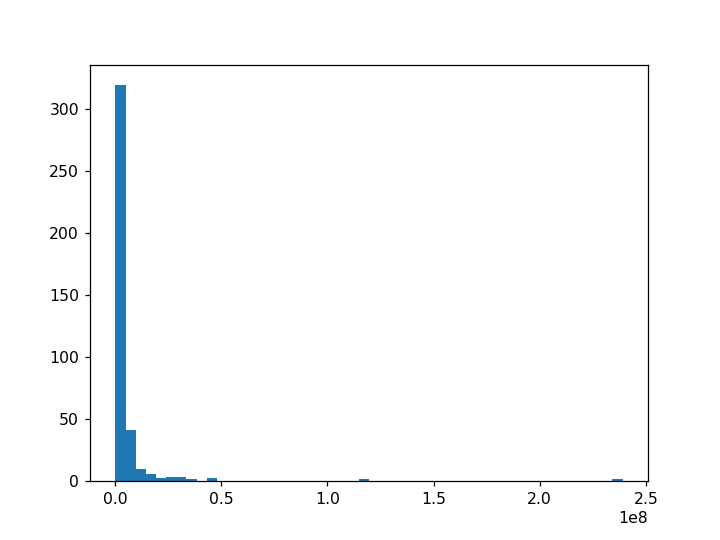

In [6]:
sigmas = []
for symbol in df_volume.columns:
    temp_sigma = round(df_volume[symbol].describe()['std'], 4)
    sigmas.append(temp_sigma)
sigmas = pd.Series(sigmas)
plt.hist(sigmas, bins=50)
plt.show()

### means

<IPython.core.display.Javascript object>


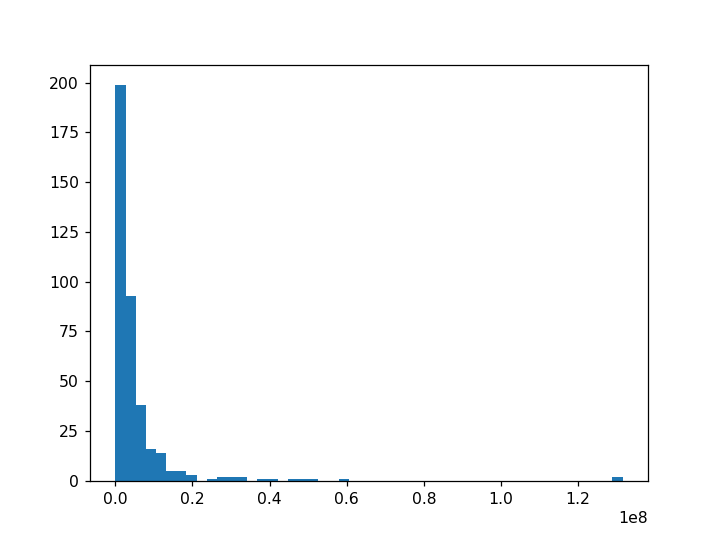

In [7]:
means = []
for symbol in df_volume.columns:
    temp_mean = round(df_volume[symbol].describe()['mean'], 4)
    means.append(temp_mean)
means = pd.Series(means)

plt.hist(means, 50)
plt.show()

### maxs

<IPython.core.display.Javascript object>


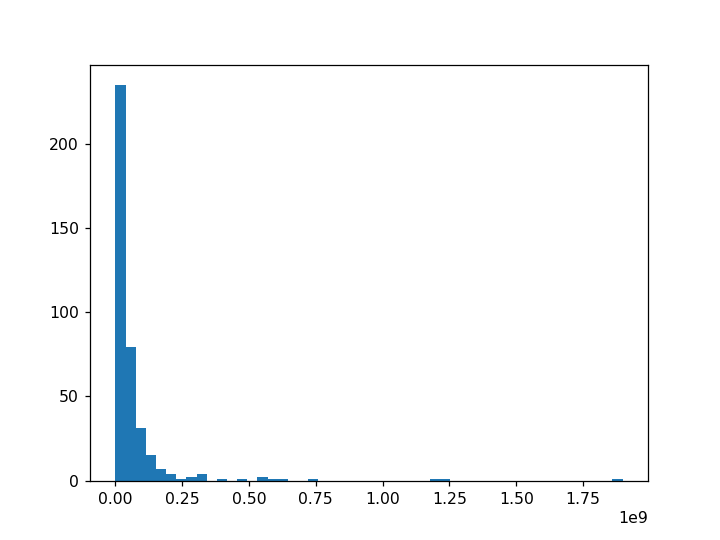

In [8]:
widest = []
for symbol in df_volume.columns:
    temp_wide = round(df_volume[symbol].describe()['max'], 4)
    widest.append(temp_wide)
widest = pd.Series(widest)

plt.hist(widest, 50)
plt.show()

### mins

<IPython.core.display.Javascript object>


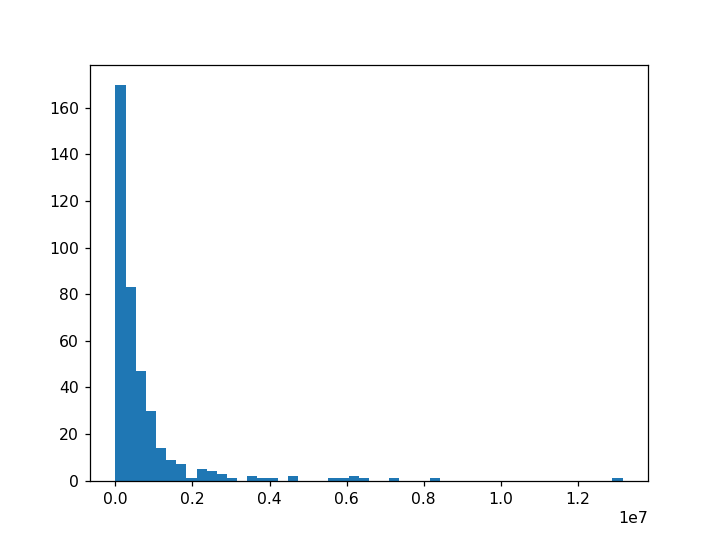

In [10]:
narrowest = []
for symbol in df_volume.columns:
    temp_narrow = round(df_volume[symbol].describe()['min'], 4)
    narrowest.append(temp_narrow)
narrowest = pd.Series(narrowest)

plt.hist(narrowest, 50)
plt.show()

### Generate histograms









Batch 0


<IPython.core.display.Javascript object>


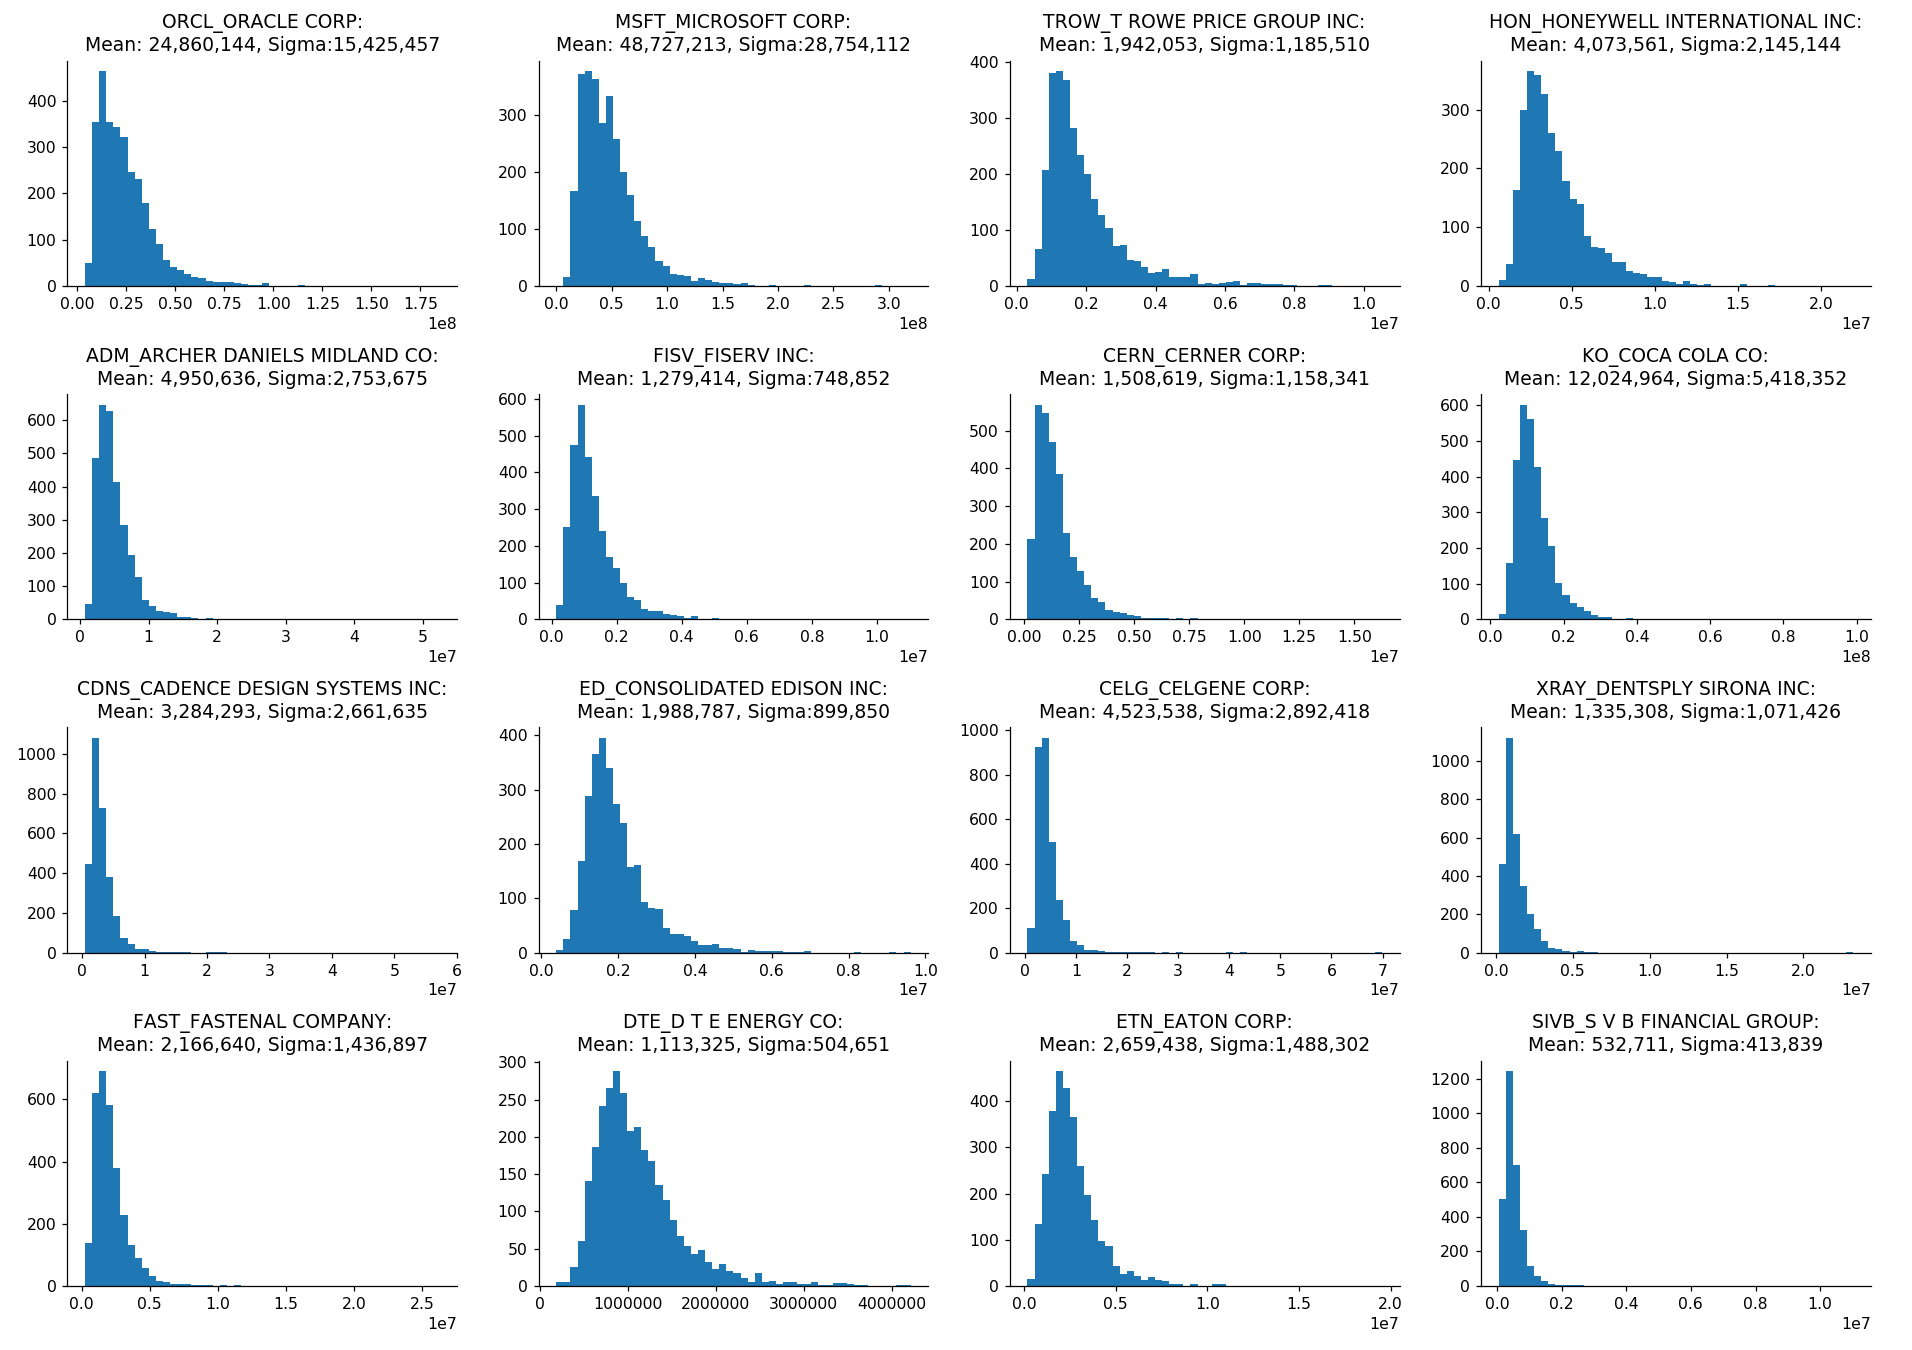

In [23]:
### matrix of subplots
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)


for i in range(nloops):
    nn = len(df_volume.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df_volume.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))    
    
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(17,12))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            temp_mean = round(df_volume[symbol].describe()['mean'], 4)
            temp_sigma = round(df_volume[symbol].describe()['std'], 4)
            
            ##--Generate Plot--#        
            ax[k,l].hist(df_volume[symbol], bins=50)
            ax[k,l].set_title('{}:\nMean: {:,.0f}, Sigma:{:,.0f}'.format(symbol, temp_mean, temp_sigma))
            #ax[k,l].set_xlim([0, 0.3])
            #ax[k,l].set_ylim([0,1100])
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
                        
    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()
    break

### Leftovers









Batch 0


<IPython.core.display.Javascript object>


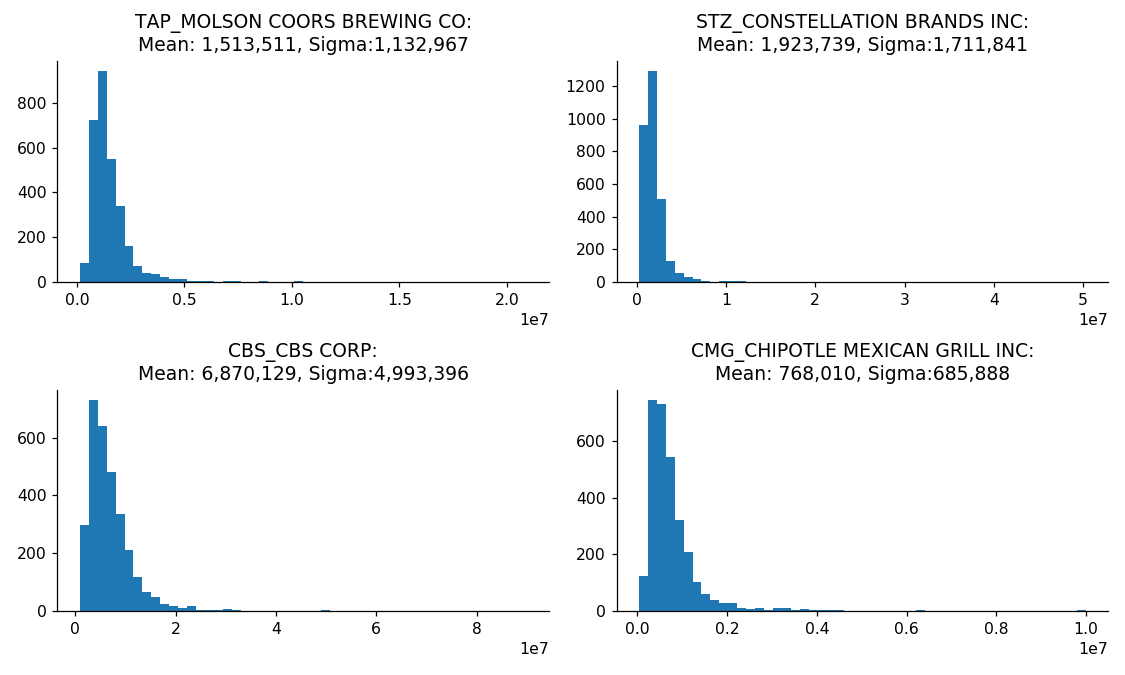

In [26]:
### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)



for i in range(nloops):
    nn = len(df_volume.columns)
    #print(lower, upper)
    temp_list = df_volume.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))  
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(10,6))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            temp_mean = round(df_volume[symbol].describe()['mean'], 4)
            temp_sigma = round(df_volume[symbol].describe()['std'], 4)
            
            ##--Generate Plot--#        
            ax[k,l].hist(df_volume[symbol], bins=50)
            ax[k,l].set_title('{}:\nMean: {:,.0f}, Sigma:{:,.0f}'.format(symbol, temp_mean, temp_sigma))
            #ax[k,l].set_xlim([0, 0.3])
            #ax[k,l].set_ylim([0,1100])
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
                        
    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()   